In [1]:
import pandas as pd

In [2]:
sp = pd.read_csv('../data/SP.csv')

In [3]:
sp = sp[sp['volume'] != 0]

In [4]:
sp.head()

,date,time,price,volume
2812944,06/30/2003,23:00:06.000,971.9,1
2812945,06/30/2003,23:00:14.000,972.0,1
2812946,06/30/2003,23:04:16.000,972.0,1
2812947,06/30/2003,23:04:34.000,972.0,9
2812948,06/30/2003,23:05:02.000,972.0,91


In [5]:
print(f"Rows with Volume = 0: {(sp['volume'] == 0).sum()}")

Rows with Volume = 0: 0


In [6]:
sp.describe(include='all')

,date,time,price,volume
count,6498085,6498085,6.498085e+06,6.498085e+06
unique,5094,747985,NaN,NaN
top,10/08/2008,07:30:00.000,NaN,NaN
freq,20796,5287,NaN,NaN
mean,NaN,NaN,1.275834e+03,1.800299e+00
std,NaN,NaN,2.756042e+02,9.512023e+00
min,NaN,NaN,6.711000e+02,1.000000e+00
25%,NaN,NaN,1.113900e+03,1.000000e+00
50%,NaN,NaN,1.251000e+03,1.000000e+00
75%,NaN,NaN,1.389700e+03,2.000000e+00


In [7]:
# Convert time column to string format first, then combine
sp['date_time'] = pd.to_datetime(sp['date'].astype(str) + ' ' + sp['time'].astype(str))

In [8]:
sp_processed = sp[['date_time', 'price', 'volume']].copy()
sp_processed.columns = ['date_time', 'price', 'volume']

In [9]:
from mlfinlab.data_structures import time_data_structures

time_bars = time_data_structures.get_time_bars(
    sp_processed, resolution="D", verbose=False
)
time_bars

<frozen mlfinlab.util.fast_ewma>:17: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2003-07-01,25,971.9,972.3,971.5,972.0,152,143,24,147744.5
2003-07-02,2189,972.6,984.0,966.5,983.2,4577,2202,2164,4453872.8
2003-07-03,4829,983.2,993.9,981.5,992.4,5480,2908,2640,5396092.9
2003-07-04,6933,992.0,993.0,983.6,986.4,4394,1857,2104,4340481.4
2003-07-07,7242,985.0,987.2,983.4,986.8,674,360,309,664186.1
...,...,...,...,...,...,...,...,...,...
2019-12-21,6498064,3208.9,3216.5,3208.9,3216.5,4,3,4,12854.4
2019-12-24,6498074,3227.7,3232.3,3227.7,3230.8,10,5,10,32307.5
2019-12-25,6498075,3229.8,3229.8,3229.8,3229.8,5,0,1,16149.0


In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=time_bars[:].index,
                open=time_bars['open'],
                high=time_bars['high'],
                low=time_bars['low'],
                close=time_bars['close'])])
fig.update_layout(title='Time Bars - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [11]:
time_bars.loc['2007-01-01':'2008-01-01', 'high'].max()

1584.0

In [12]:
time_bars.loc['2009-01-01':'2010-01-01', 'low'].min()

671.1

In [13]:
high_2007 = time_bars.loc['2007', 'high'].max()
low_2009 = time_bars.loc['2009', 'low'].min()
decline_pct = (low_2009 - high_2007) / high_2007 * 100

print(f"2007 High: {high_2007:.2f}")
print(f"2009 Low: {low_2009:.2f}")
print(f"Total decline: {decline_pct:.1f}%")

2007 High: 1584.00
2009 Low: 671.10
Total decline: -57.6%


In [14]:
time_bars[(time_bars.index >= '2007-01-01') & (time_bars.index <= '2008-01-01')]['high'].max()

1584.0

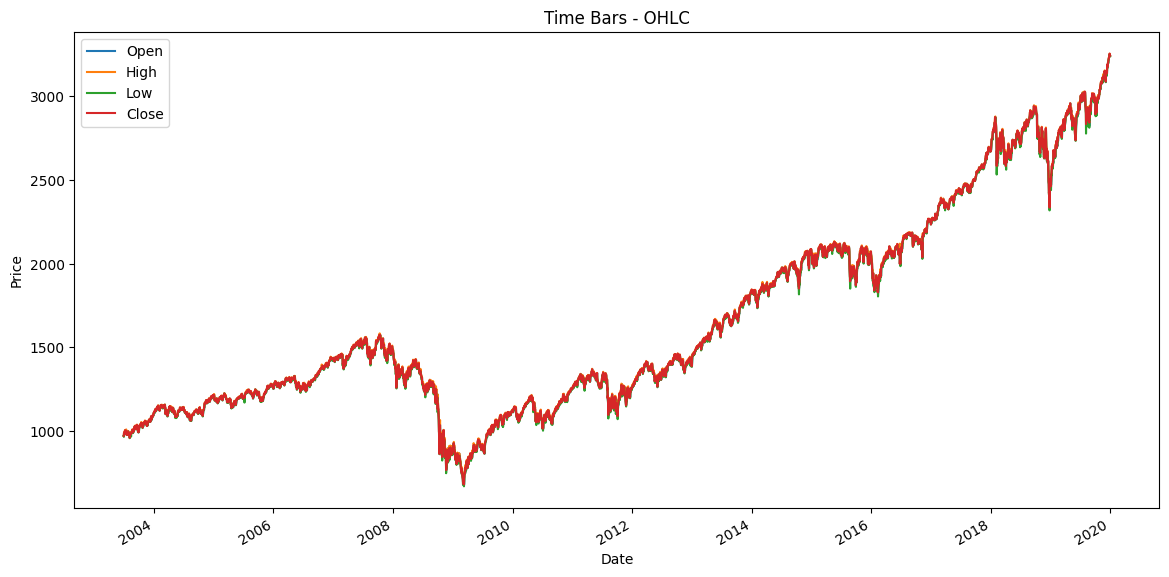

In [15]:
import matplotlib.pyplot as plt

# Plot all OHLC data
fig, ax = plt.subplots(figsize=(14, 7))
time_bars[['open', 'high', 'low', 'close']].plot(ax=ax)
plt.title('Time Bars - OHLC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.show()

In [30]:
from mlfinlab.data_structures import standard_data_structures
dollar_bars = standard_data_structures.get_dollar_bars(
    sp_processed, threshold=10000000, batch_size=1000000, verbose=False
)
print("Dollar Bars:")
print(dollar_bars)
print(f"Dollar bars shape: {dollar_bars.shape}")

Dollar Bars:
                         tick_num    open    high     low   close  volume   
date_time                                                                   
2003-07-03 00:13:23.000      4831   971.9   993.9   966.5   992.1   10212  \
2003-07-07 15:58:47.000      9142   992.3  1003.1   983.4  1002.7   10104   
2003-07-10 02:18:21.000     13312  1002.7  1007.3   998.1   998.2    9997   
2003-07-11 06:55:45.000     16408   998.2   998.6   985.2   987.8   10270   
2003-07-15 08:05:39.000     21361   987.8  1011.0   987.0  1010.5    9975   
...                           ...     ...     ...     ...     ...     ...   
2019-01-02 01:58:58.809   6487355  2779.5  2784.7  2317.7  2475.7    3922   
2019-03-13 00:07:21.316   6490000  2476.4  2819.0  2439.0  2792.5    3767   
2019-05-27 07:44:31.059   6492505  2793.2  2957.3  2791.7  2831.5    3491   
2019-08-14 07:11:16.435   6495067  2830.9  3027.2  2733.0  2887.7    3464   
2019-11-06 06:16:13.864   6497580  2889.8  3084.3  2811.3  3073

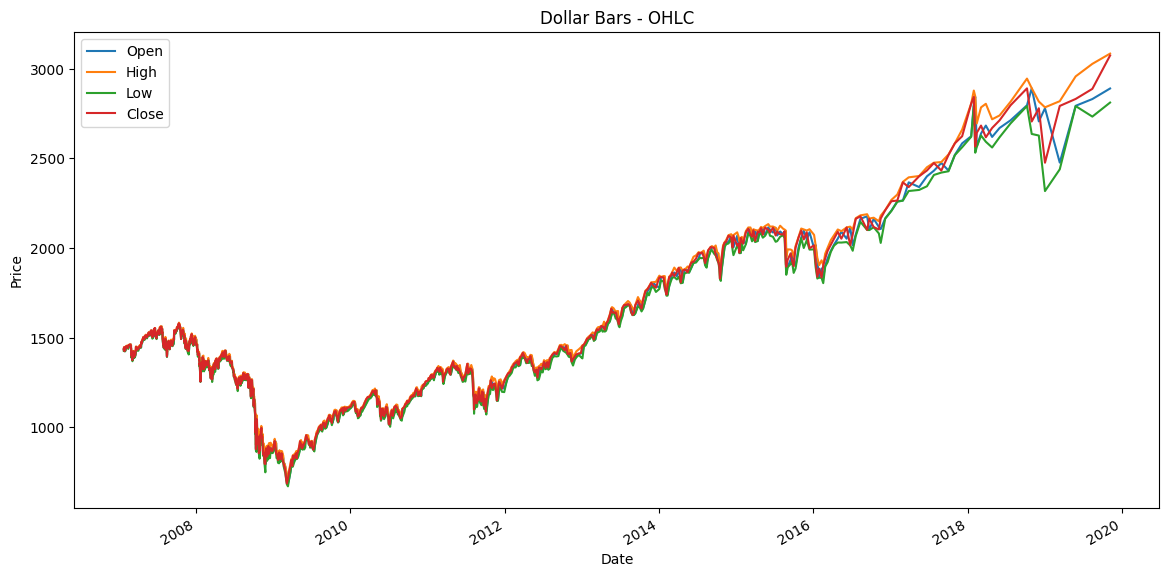

In [31]:
# Plot all OHLC data
fig, ax = plt.subplots(figsize=(14, 7))
dollar_bars[-1000:][['open', 'high', 'low', 'close']].plot(ax=ax)
plt.title('Dollar Bars - OHLC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.show()

In [33]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=time_bars[-500:].index,
                open=time_bars['open'],
                high=time_bars['high'],
                low=time_bars['low'],
                close=time_bars['close'])])
fig.update_layout(title='Time Bars - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [34]:
# Dollar Bars Analysis

fig = go.Figure(data=[go.Candlestick(x=dollar_bars[:].index,
                open=dollar_bars['open'],
                high=dollar_bars['high'],
                low=dollar_bars['low'],
                close=dollar_bars['close'])])
fig.update_layout(title='Dollar Bars - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [20]:
'''Snippet 3.1 - Daily Volatility Estimates'''

# def getdailyVol(close, span0=100):
#     df0 = close.index.searchsorted(close.index - pd.Timedelta(days=1))
#     df0 = df0[df0 > 0]
#     df0 = pd.Series(close.index[df0 - 1], index=close.index[close.shape[0] - df0.shape[0]:])
#     df0 = close.loc[df0.index]/close.loc[df0.values].values - 1.0
#     df0 = df0.ewm(span=span0).std()
#     return df0

'Snippet 3.1 - Daily Volatility Estimates'

In [35]:
# From GPT-5

def get_daily_vol(close, span=100, lookback=pd.Timedelta('1D')):
    # Ensure we are working with a datetime index Series
    if isinstance(close, pd.DataFrame):
        if 'close' not in close.columns:
            raise ValueError("DataFrame must have a 'close' column.")
        close = close['close']
    if 'date_time' in getattr(close, 'columns', []):
        close = close.set_index('date_time')['close']
    close = close.sort_index()
    if not isinstance(close.index, pd.DatetimeIndex):
        raise ValueError("Input series must have a DatetimeIndex.")

    prev = close.index.searchsorted(close.index - lookback)
    prev = prev[prev > 0]
    prev_ts = pd.Series(close.index[prev - 1], index=close.index[-prev.shape[0]:])
    returns = close.loc[prev_ts.index] / close.loc[prev_ts.values].values - 1
    return returns.ewm(span=span).std()

In [22]:
'''Snippet 2.4 the Symetric CUSUM Filter'''

# def getTEvents(gRaw, h):
#     tEvents, sPos, sNeg = [], 0, 0
#     diff = gRaw.diff()
#     for i in diff.index[1:]:
#         sPos = max(0, sPos + diff.loc[i])
#         sNeg = min(0, sNeg + diff.loc[i])
#         # Use dynamic threshold if h is a Series, skip if not available
#         if isinstance(h, pd.Series):
#             if i not in h.index:
#                 continue
#             threshold = h.loc[i]
#         else:
#             threshold = h
#         if sNeg < -threshold:
#             sNeg = 0
#             tEvents.append(i)
#         elif sPos > threshold:
#             sPos = 0
#             tEvents.append(i)
#     return pd.DatetimeIndex(tEvents)

'Snippet 2.4 the Symetric CUSUM Filter'

In [36]:
# From GPT-5
def get_t_events(price, h):
    price = price.sort_index()
    if isinstance(h, pd.Series):
        h = h.reindex(price.index)
    diff = price.diff().dropna()
    t_events, s_pos, s_neg = [], 0.0, 0.0

    for t in diff.index:
        s_pos = max(0.0, s_pos + diff.loc[t])
        s_neg = min(0.0, s_neg + diff.loc[t])
        threshold = h.loc[t] if isinstance(h, pd.Series) else h
        if pd.isna(threshold):
            continue
        if s_neg < -threshold:
            s_neg = 0.0
            t_events.append(t)
        elif s_pos > threshold:
            s_pos = 0.0
            t_events.append(t)
    return pd.DatetimeIndex(t_events)

In [37]:
dv = get_daily_vol(time_bars['close'], span=100)

In [38]:
tevents = get_t_events(time_bars['close'], dv)

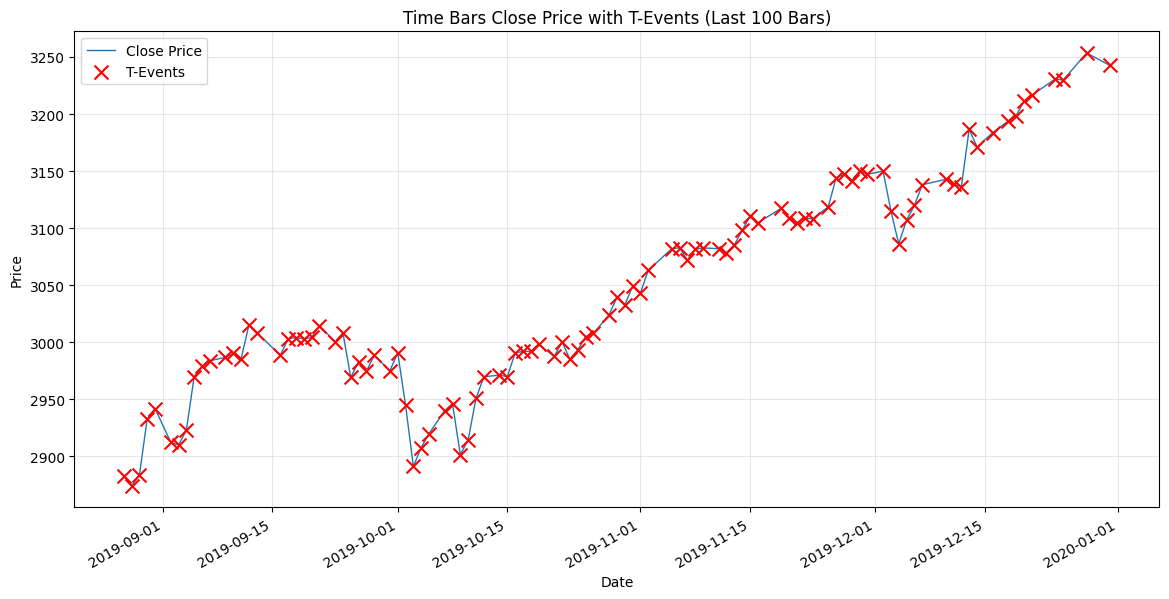

In [39]:
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot last 100 close prices
time_bars['close'][-100:].plot(ax=ax, label='Close Price', linewidth=1)

# Overlay tevents with 'x' markers (only those in the last 500 bars)
if len(tevents) > 0:
    # Filter tevents to only those in the last 500 bars
    last_x_dates = time_bars[-100:].index
    tevents_filtered = tevents[tevents.isin(last_x_dates)]
    
    if len(tevents_filtered) > 0:
        # Get close prices at tevent dates
        tevent_prices = time_bars.loc[tevents_filtered, 'close']
        ax.scatter(tevents_filtered, tevent_prices, color='red', marker='x', s=100, 
                   label='T-Events', zorder=5)

plt.title('Time Bars Close Price with T-Events (Last 100 Bars)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
def get_daily_vol(close, span=100, lookback=pd.Timedelta("1D")):
    if isinstance(close, pd.DataFrame):
        close = close['close']
    close = close.sort_index()
    if not isinstance(close.index, pd.DatetimeIndex):
        raise ValueError("Input series must have a DatetimeIndex.")

    idx = close.index
    prev_locs = idx.get_indexer(idx - lookback, method='pad')
    valid = prev_locs >= 0
    rets = close.iloc[valid].values / close.iloc[prev_locs[valid]].values - 1.0
    rets = pd.Series(rets, index=idx[valid])
    return rets.ewm(span=span).std()

In [41]:
if not isinstance(dollar_bars.index, pd.DatetimeIndex):
    if 'date_time' in dollar_bars.columns:
        dollar_bars['date_time'] = pd.to_datetime(dollar_bars['date_time'])
        dollar_bars = dollar_bars.set_index('date_time')
    else:
        dollar_bars.index = pd.to_datetime(dollar_bars.index)
dollar_bars = dollar_bars.sort_index()

dv_dollar = get_daily_vol(dollar_bars['close'], span=100)
devents = get_t_events(dollar_bars['close'], dv_dollar)

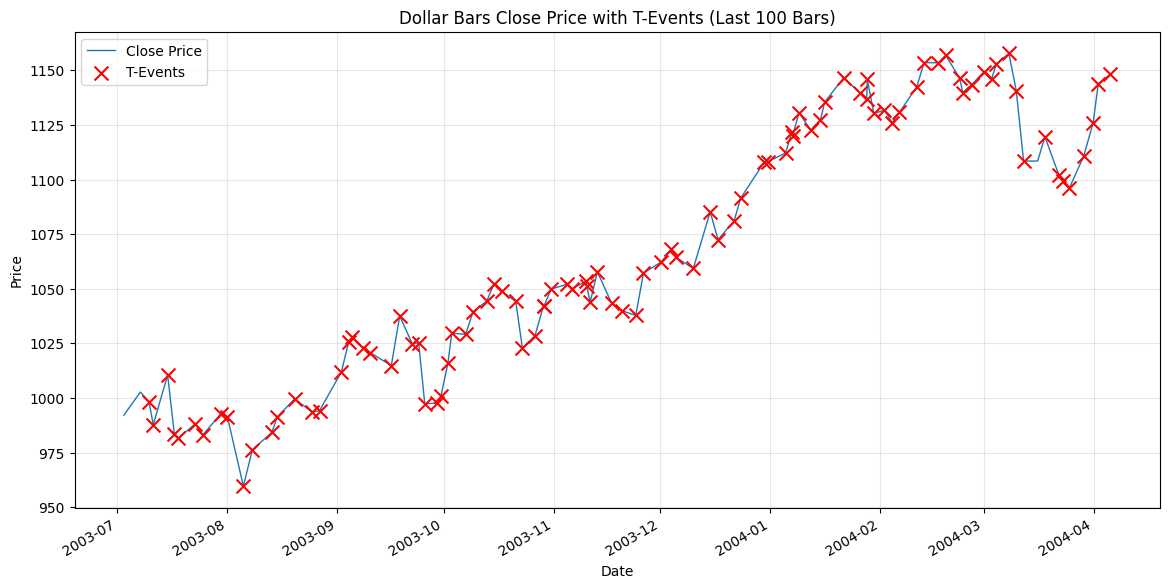

In [49]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot last 100 close prices
dollar_bars['close'][:100].plot(ax=ax, label='Close Price', linewidth=1)

# Overlay tevents with 'x' markers (only those in the last 500 bars)
if len(tevents) > 0:
    # Filter tevents to only those in the last 500 bars
    last_x_dates = dollar_bars[:100].index
    tevents_filtered = devents[devents.isin(last_x_dates)]
    
    if len(tevents_filtered) > 0:
        # Get close prices at tevent dates
        tevent_prices = dollar_bars.loc[tevents_filtered, 'close']
        ax.scatter(tevents_filtered, tevent_prices, color='red', marker='x', s=100, 
                   label='T-Events', zorder=5)

plt.title('Dollar Bars Close Price with T-Events (Last 100 Bars)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
'''Snippet 3.2 TRIPPLE-BARRIER LABELING METHOD'''

def applyPtSlOnT1(close, events, ptSl, molecule):
    events_ = events.loc[molecule]
    out = events_[['t1']].copy(deep=True)
    if ptSl[0] > 0:
        pt = ptSl[0] * events_['trgt']
    else:
        pt = pd.Series(index=events.index) #NaNa
    if ptSl[1] > 0:
        sl = -ptSl[1] * events_['trgt']
    else:
        sl = pd.Series(index=events.index) #NaNa
    for loc, t1 in events_['t1'].fillna(close.index[-1]).iteritems():
        df0 = close[loc:t1]  # path prices
        df0 = (df0 / close[loc] - 1)  # path returns
        out.loc[loc, 'sl'] = df0[df0 < sl.loc[loc]].index.min()  # earliest stop loss
        out.loc[loc, 'pt'] = df0[df0 > pt.loc[loc]].index.min()  # earliest profit taking
    return out
    

In [ ]:
import numpy as np
'''Snippet 3.5 LABELING FOR SIDE AND SIZE'''

def getBins(events, close):
    events_ = events.dropna(subset=['t1'])
    px = events_.index.union(events_['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')

    out = pd.DataFrame(index=events_.index)
    out['ret'] = px.loc[events_['t1'].values].values / px.loc[events_.index].values - 1.0
    out['bin'] = np.sign(out['ret'])
    return out


In [ ]:
'''Snippet 3.8 DROPPING UNDER-POPULATED LABELS'''

def dropLabels(events, minPtc=0.05):

    while True:
        df0 = events['bin'].value_counts(normalize=True)
        if df0.min() > minPtc or df0.shape[0] < 3:
            break
        print( 'dropped label', df0.argnim())
        events = events[events['bin'] != df0.argmin()]
    return events